In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read data
path  ='/content/data.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [3]:
#show data details
print('data = \n' ,data.head(5) )
print('**************************************')
print('data.describe = \n',data.describe())
print('**************************************')

data = 
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
**************************************
data.describe = 
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
**************************************


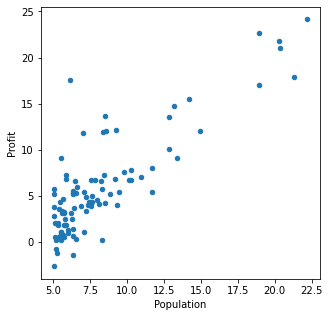

In [4]:
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

In [5]:
# adding a new column called ones before the data
data.insert(0, 'Ones', 1)
print('new data = \n' ,data.head(2) )

new data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302


In [6]:
# separate X (training data) from y (target variable)
cols = data.shape[1] #shape express 97 to 2 then cols = 2 
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [7]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)

X.shape =  (97, 2)
theta.shape =  (1, 2)
y.shape =  (97, 1)


In [8]:
# cost function
def computeCost(X, y, theta):
    z = np.power(  ((X * theta.T) - y)    , 2    )
    return np.sum(z) / (2 * len(X))

In [9]:
print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

computeCost(X, y, theta) =  32.072733877455676


In [10]:
# GD function
def gradientDescent(X, y, theta, alpha, iters):
    
    temp = np.matrix(np.zeros(theta.shape))
    
    #print('temp is : ' , temp)
    parameters = int(theta.ravel().shape[1]) # 1 x 2 shape[1] express seconed value
    
    # print('parameter is : ' , parameters)
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [11]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000  #iters it is number of temps or trying

In [12]:
Best_Theta, Loss_Function = gradientDescent(X, y, theta, alpha, iters)


In [13]:
print('computeCost = ' , computeCost(X, y, Best_Theta))


computeCost =  4.515955503078912


In [14]:
# get best fit line
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = Best_Theta[0, 0] + (Best_Theta[0, 1] * x)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

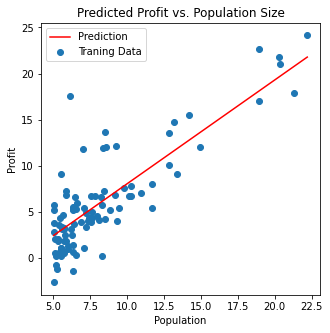

In [15]:
# draw the line

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

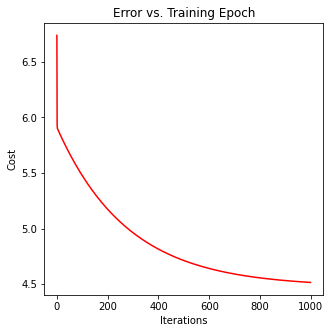

In [17]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), Loss_Function, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')